<a href="https://colab.research.google.com/github/eric-sun92/pytorch_computer_vision_intro/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COMPUTER VISION**

torchvision - base domain library for Pytorch computer vision 

torchvision.datasets - get datasets/data loading functions for computer vision

torchvision.models - get pretrained models for computer vision

torchvision.transforms - functions to help transform input image data to ml acceptable forms

torch.utils.data.Dataset - Base library for Pytorch data sets 

torch.utils.data.DataLoader - creates a python iterable over a dataset


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__, torchvision.__version__)

# notes 
# first: import data, usign torchvision.datasets
  # train_data = datasets.Fashion(root, train, download, transform, target_transform)
  # .classes -> gives list of classes, .class_to_idx -> puts classes into dict
  # .targets -> gives list of targets (labels) * basically the which class the object goes into
  # can also get features, labels = train_data (not batched)
# second: turn data into batched data using torch.utils.data.DataLoader
# third: features, labels = next(iter(train_dataloader))
# fourth: enumerate(train_dataloader) -> batch_idx, (features, labels)

2.0.1+cu118 0.15.2+cu118


In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11895657.55it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202603.32it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3748373.16it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15657923.85it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [5]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [6]:
image, label = train_data[3]

In [7]:
image.shape, label

(torch.Size([1, 28, 28]), 3)

(-0.5, 27.5, 27.5, -0.5)

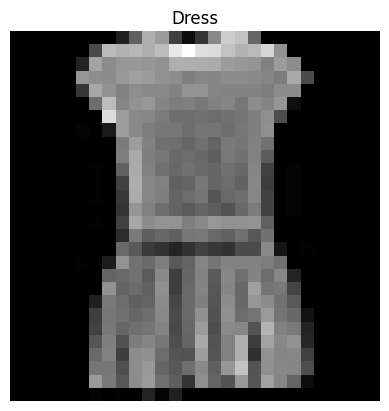

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

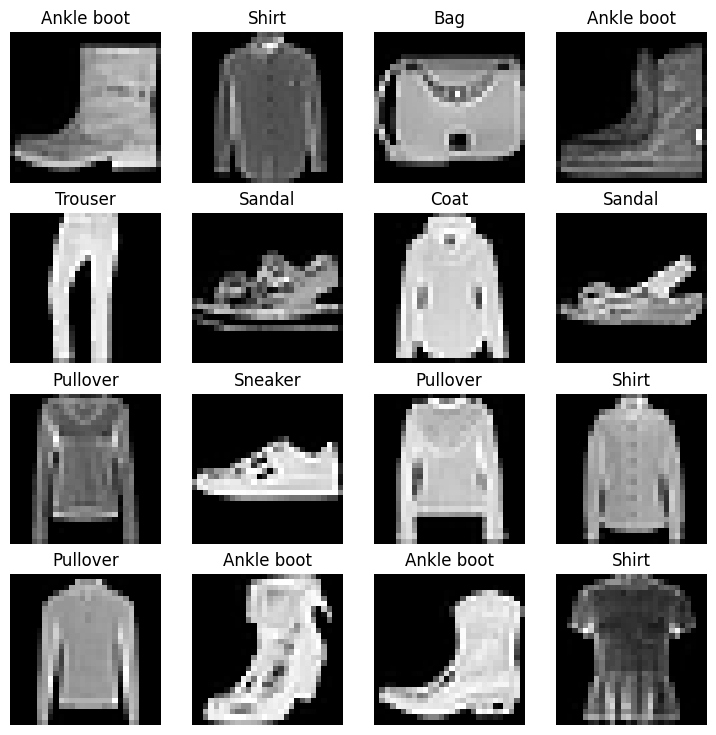

In [9]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

# turn train_data and test_data into batches

train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [11]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [12]:
# what is inside data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0784, 0.4431, 0.4588,
          0.0039, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0196, 0.0000, 0.2784, 0.7725, 0.3529, 0.4118,
          0.6471, 0.1765, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0196, 0.0000, 0.2627, 0.6392, 0.0000, 0.0000, 0.0000,
          0.1294, 0.5608, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0039, 0.0000, 0.0510, 0.6157, 0.0000, 0.0000, 0.0314, 0.0431,
          0.0000, 0.4549, 0.3451, 0.0000, 0.0196, 0.0000,

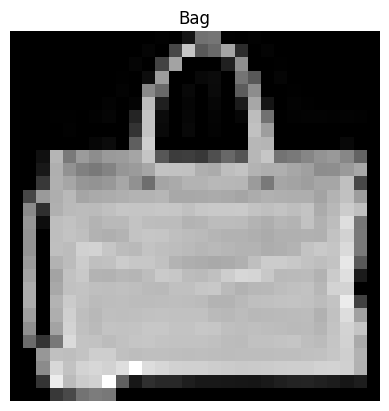

In [13]:
rand_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[rand_idx], train_labels_batch[rand_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(img)

In [14]:
# build computer vision baseline model

#create flatten layer

flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x).squeeze()
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([784]))

In [15]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int, 
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [17]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)


In [18]:
# import accuracy
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("already downloaded")
else:
  print("downloading")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

downloading


In [19]:
from helper_functions import accuracy_fn

In [20]:
# function to time our functions

from timeit import default_timer as timer

def print_train_time(start, end, device=None):
  total_time = end - start
  print(f"Train time on {device} is {total_time:.2f} seconds")
  return total_time


In [21]:
start_time = timer()
# some code ...
end_time = timer()
print_train_time(start_time, end_time, device="cpu")

Train time on cpu is 0.00 seconds


4.857599999752438e-05

In [22]:
#progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start_on_cpu = timer()

#start small -> make changes without wasting too much time
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"epoc: {epoch}\n")

  train_loss = 0

  #loop through training batch

  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # X is only 32 now
    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
  
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
  
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")
    
  train_loss /= len(train_dataloader)

  # test loop

  test_loss = 0
  test_acc = 0

  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #foward pass
      test_pred = model_0(X_test)
      # calculate loss
      test_loss += loss_fn(test_pred, y_test)

      # calc accuracy
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))
    
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f}, testLoss: {test_loss:.4f}, testAcc: {test_acc:.4f}")

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(train_time_start_on_cpu, 
                                            train_time_end_on_cpu,
                                            str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

epoc: 0

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.5904, testLoss: 0.5095, testAcc: 82.0387
epoc: 1

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4763, testLoss: 0.4799, testAcc: 83.1969
epoc: 2

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4550, testLoss: 0.4766, testAcc: 83.4265
Train time on cpu is 60.42 seconds


In [23]:
# eval model
def eval_model(model,
               data_loader, 
               loss_fn, 
               acc_fn, device):
  # return dict containing results of model predicting on data loader

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X = X.to(device)
      y = y.to(device)

      y_pred = model(X)
      
      loss += loss_fn(y_pred, y)
      acc += acc_fn(y, torch.argmax(y_pred, dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {
      "model": model.__class__.__name__,
      "loss": loss.item(),
      "acc": acc
  }

model_0_results = eval_model(model_0,
                    test_dataloader,
                    loss_fn,
                    accuracy_fn, "cpu")

model_0_results

{'model': 'FashionMNISTModelV0',
 'loss': 0.47663894295692444,
 'acc': 83.42651757188499}

In [24]:
# device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [25]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, in_features, hidden_units, out_features):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, out_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_1 = FashionMNISTModelV1(784, 10, len(class_names)).to(device)

In [26]:
loss_fn_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [27]:
def train_step(model, dataloader, loss_fn, acc_fn, optimizer, device):
    model.train()
    loss = 0
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):

      X = X.to(device)
      y = y.to(device)

      y_pred = model(X)

      loss = loss_fn(y_pred, y)
      train_loss += loss
      train_acc += acc_fn(y, torch.argmax(y_pred, dim=1))

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch % 400 == 0:
        print(f"Looked at {batch * len(X)} / {len(dataloader.dataset)} samples")

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    print(f"loss: {train_loss:.5f}, acc: {train_acc:.2f}")

In [28]:
def test_step(model, dataloader, loss_fn, acc_fn, device):
  model.eval()
  with torch.inference_mode():
    loss, acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
      X = X.to(device)
      y = y.to(device)

      y_pred_test = model(X)

      loss += loss_fn(y_pred_test, y)
      acc += acc_fn(y, torch.argmax(y_pred_test, dim=1))

    loss /= len(dataloader)
    acc /= len(dataloader)

    print(f"testLoss: {loss:.4f}, testAcc: {acc:.2f}")



In [29]:
torch.manual_seed(42)
from timeit import default_timer as timer

start_time_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  train_step(model_1, train_dataloader, loss_fn_1, accuracy_fn, optimizer_1, device)
  test_step(model_1, test_dataloader, loss_fn_1, accuracy_fn, device)

end_time_gpu = timer()
total_time_1 = end_time_gpu - start_time_gpu
print(f"total time: {total_time_1:.2f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
loss: 0.69543, acc: 74.86
testLoss: 0.5274, testAcc: 80.64
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
loss: 0.49355, acc: 82.22
testLoss: 0.5061, testAcc: 81.65
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
loss: 0.45598, acc: 83.45
testLoss: 0.4832, testAcc: 82.48
total time: 57.86 seconds


In [30]:
model_1_results = eval_model(model_1,
                    test_dataloader,
                    loss_fn_1,
                    accuracy_fn, device)

model_1_results

{'model': 'FashionMNISTModelV1',
 'loss': 0.4832005202770233,
 'acc': 82.47803514376997}

In [31]:
class FashionMNISTModel_2(nn.Module):
  def __init__(self, in_shape, hidden_units, out_shape):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(
            in_channels=in_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier_block = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 7 * 7,
                  out_features=out_shape)
    )
  
  def forward(self, x):
    x = self.conv_block1(x)
    x = self.conv_block2(x)
    x = self.classifier_block(x)
    return x
  
model_2 = FashionMNISTModel_2(in_shape=1, hidden_units=10, out_shape=10).to(device)

In [32]:
cnn_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=1
)

fake_image = torch.rand(3, 64, 64)
fake_image.shape

torch.Size([3, 64, 64])

In [33]:
fake_image_out = cnn_layer(fake_image)
fake_image_out.shape

# input - kernel_size + 1 -> gives output
# input size / stride = output size
# input + 2(padding) -> gives output

torch.Size([10, 64, 64])

In [34]:
compress_layer = nn.MaxPool2d(kernel_size=2)

compressed_image = compress_layer(fake_image_out)
compressed_image.shape

torch.Size([10, 32, 32])

In [35]:
dummy_image = torch.rand(1, 28, 28).to(device)
result = model_2(dummy_image.unsqueeze(0))
result

tensor([[-0.0245, -0.0274, -0.0153,  0.0063,  0.0606,  0.0202, -0.0500,  0.0697,
         -0.0446, -0.0206]], grad_fn=<AddmmBackward0>)

In [36]:
from helper_functions import accuracy_fn

loss_fn_2 = nn.CrossEntropyLoss()
optimizer_2 = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.03)

In [37]:
# training loop
start_time_2 = timer()
for epoch in tqdm(range(3)):
  train_step(model_2, train_dataloader, loss_fn_2, accuracy_fn, optimizer_2, device)
  test_step(model_2, test_dataloader, loss_fn_2, accuracy_fn, device)

end_time_2 = timer()
total_time_2 = end_time_2 - start_time_2
print(f"time: {total_time_2}")

  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
loss: 0.80890, acc: 70.69
testLoss: 0.4454, testAcc: 83.93
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
loss: 0.40771, acc: 85.31
testLoss: 0.3868, testAcc: 86.31
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
loss: 0.35572, acc: 87.23
testLoss: 0.3753, testAcc: 86.61
time: 179.34250661899998


In [38]:
model_2_results = eval_model(model_2, test_dataloader, loss_fn_2, accuracy_fn, device)
model_2_results

{'model': 'FashionMNISTModel_2',
 'loss': 0.3753122091293335,
 'acc': 86.61142172523962}

In [39]:
import pandas as pd

compare_model_results = pd.DataFrame([
    model_0_results,
    model_1_results,
    model_2_results
])
compare_model_results

,model,loss,acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.483201,82.478035
2,FashionMNISTModel_2,0.375312,86.611422


In [40]:
compare_model_results["training time"] = [total_train_time_model_0, total_time_1, total_time_2]
compare_model_results

,model,loss,acc,training time
0,FashionMNISTModelV0,0.476639,83.426518,60.422978
1,FashionMNISTModelV1,0.483201,82.478035,57.860359
2,FashionMNISTModel_2,0.375312,86.611422,179.342507


Text(0, 0.5, 'model')

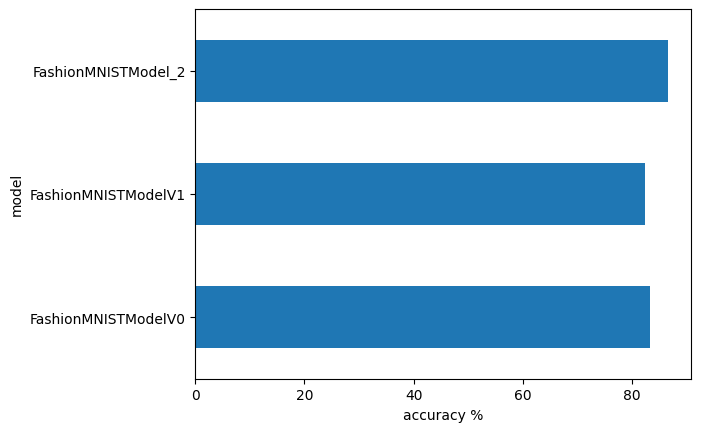

In [41]:
compare_model_results.set_index("model")["acc"].plot(kind="barh")
plt.xlabel("accuracy %")
plt.ylabel("model")

In [42]:
# make and evaluate random predictions with best model

def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare sample (add batch dimension and send to device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass 
      pred_logits = model(sample)

      # get prediction probability
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # get pred_prob off gpu
      pred_probs.append(pred_prob.cpu())

  #stack the pred_probs to turn list into tensor
  return torch.stack(pred_probs)

  


In [43]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

(-0.5, 27.5, 27.5, -0.5)

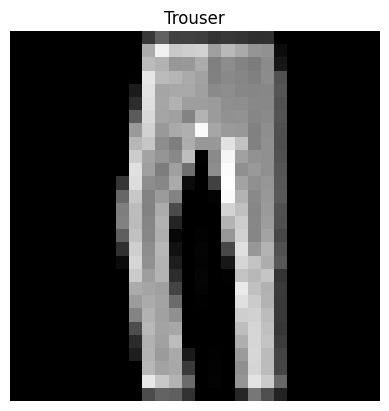

In [44]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [45]:
prediction_probabilities = make_predictions(model_2, test_samples, device)
prediction_probabilities.shape

torch.Size([9, 10])

In [46]:
predictions = torch.argmax(prediction_probabilities, dim=1)
predictions.shape

torch.Size([9])

In [47]:
predictions

tensor([1, 7, 6, 1, 1, 3, 2, 3, 8])

In [48]:
test_labels

[1, 7, 6, 1, 1, 3, 2, 3, 8]

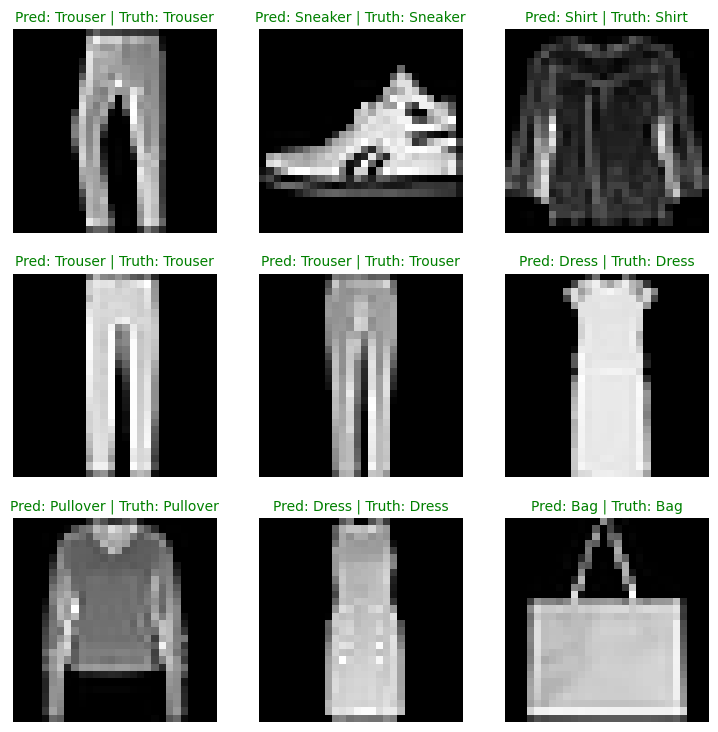

In [49]:
#plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[predictions[i]]
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

In [50]:
from tqdm.auto import tqdm

y_preds = []

model_2.eval()
with torch.inference_mode():
  for (X, y) in tqdm(test_dataloader):
    X, y = X.to(device), y.to(device)

    y_logits = model_2(X)

    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_preds_tensor = torch.cat(y_preds)
y_preds_tensor

  0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [51]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend verison should be higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.6 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
mlxtend version: 0.22.0


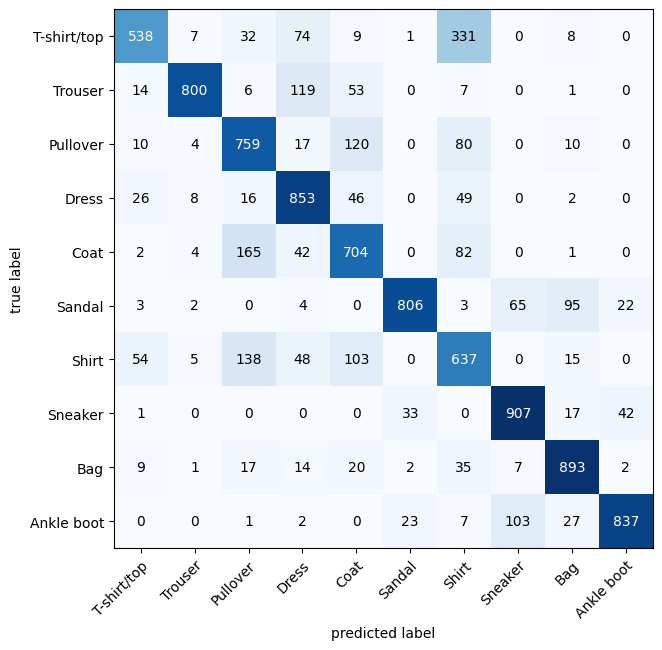

In [57]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds_tensor, 
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

In [58]:
confmat_tensor

tensor([[538,   7,  32,  74,   9,   1, 331,   0,   8,   0],
        [ 14, 800,   6, 119,  53,   0,   7,   0,   1,   0],
        [ 10,   4, 759,  17, 120,   0,  80,   0,  10,   0],
        [ 26,   8,  16, 853,  46,   0,  49,   0,   2,   0],
        [  2,   4, 165,  42, 704,   0,  82,   0,   1,   0],
        [  3,   2,   0,   4,   0, 806,   3,  65,  95,  22],
        [ 54,   5, 138,  48, 103,   0, 637,   0,  15,   0],
        [  1,   0,   0,   0,   0,  33,   0, 907,  17,  42],
        [  9,   1,  17,  14,  20,   2,  35,   7, 893,   2],
        [  0,   0,   1,   2,   0,  23,   7, 103,  27, 837]])

In [64]:
# save and load best performing model

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = 'pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save model state dict

print(f"saving model to {MODEL_SAVE_PATH}")

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH
           )


saving model to models/pytorch_computer_vision_model_2.pth


In [65]:
# create a new instance and load it back in
loaded_model_2 = FashionMNISTModel_2(in_shape=1, hidden_units=10, out_shape=10)

loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_2 = loaded_model_2.to(device)
loaded_model_2

FashionMNISTModel_2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [66]:
# eval loaded model

model_2_results

{'model': 'FashionMNISTModel_2',
 'loss': 0.3753122091293335,
 'acc': 86.61142172523962}

In [67]:
eval_model(loaded_model_2, test_dataloader, loss_fn_2, accuracy_fn, device)

{'model': 'FashionMNISTModel_2',
 'loss': 0.3753122091293335,
 'acc': 86.61142172523962}